In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import keras
%matplotlib inline

Using Theano backend.


In [2]:
titanic_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
titanic_df = titanic_df.drop(['Cabin','PassengerId','Ticket','Name'],axis=1)
test_df = test_df.drop(['Cabin','Ticket','Name'],axis=1)

In [6]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


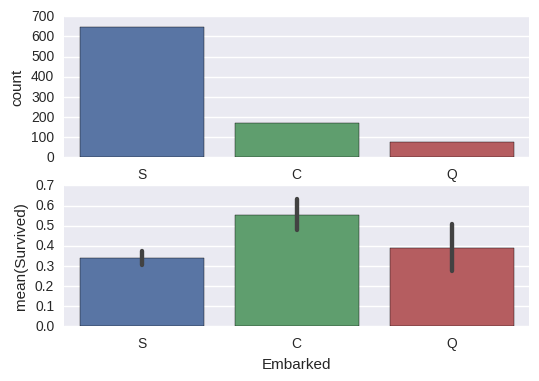

In [7]:
#Embarked
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace= True)


fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
sns.countplot(x='Embarked', data=titanic_df, ax=ax1)
sns.barplot(x='Embarked',y='Survived',data=titanic_df, ax=ax2)

titanic_df.drop(['Embarked'],axis=1,inplace=True)
test_df.drop(['Embarked'],axis=1, inplace = True)

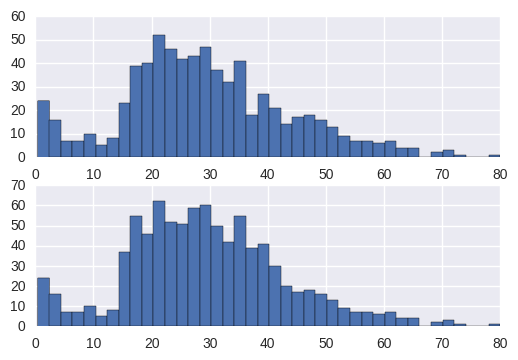

In [8]:
#Age
import math

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
avg = titanic_df['Age'].mean()
std = titanic_df['Age'].std()
median = titanic_df['Age'].median()
titanic_df['Age'].hist(bins=40, ax = ax1)
def random_age(age):    
    if(math.isnan(age)):                
        numero = np.random.randint(avg-std,avg+std)        
        return numero
    else:        
        return age
titanic_df['Age'] = titanic_df['Age'].apply(random_age)
test_df['Age'] = titanic_df['Age'].apply(random_age)

titanic_df['Age'].hist(bins=40, ax = ax2)


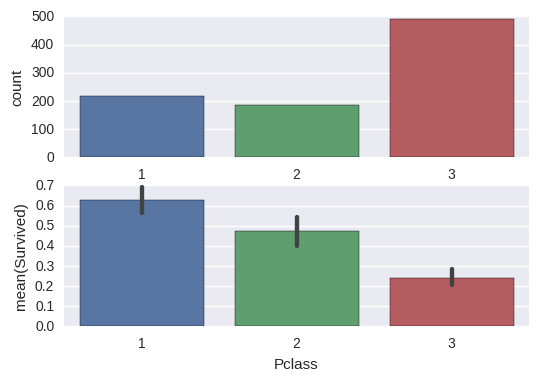

In [9]:
#PCLASS

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

sns.countplot(x='Pclass',data=titanic_df, ax = ax1)

sns.barplot(x='Pclass',y='Survived',data = titanic_df, ax= ax2)

pclass_dummies_titanic  = pd.get_dummies(titanic_df['Pclass'])
pclass_dummies_titanic.columns=['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'],inplace=True, axis= 1)

titanic_df = titanic_df.join(pclass_dummies_titanic)
titanic_df.drop(['Pclass'],inplace=True, axis = 1)

pclass_dummies_titanic = pd.get_dummies(test_df['Pclass'])
pclass_dummies_titanic.columns=['Class_1','Class_2','Class_3']
pclass_dummies_titanic.drop(['Class_3'],inplace=True, axis= 1)

test_df = test_df.join(pclass_dummies_titanic)
test_df.drop(['Pclass'],inplace=True, axis = 1)

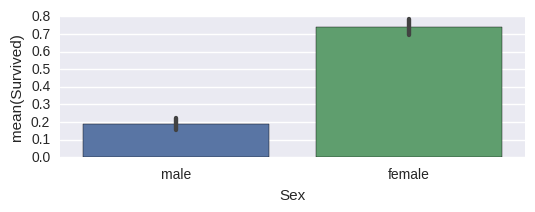

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
sns.barplot('Sex','Survived',data=titanic_df, ax = ax1)

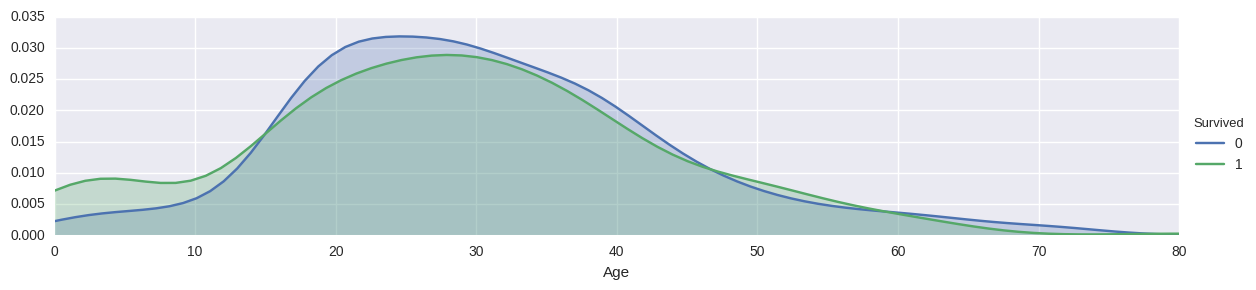

In [11]:
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend()

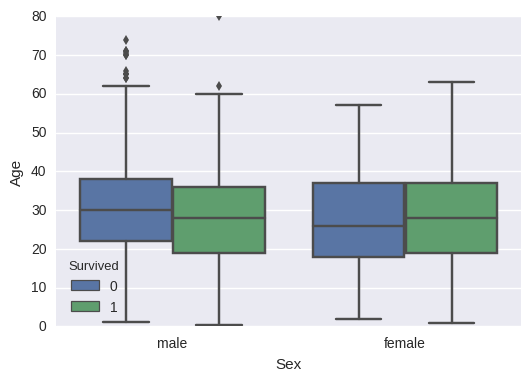

In [12]:
sns.boxplot(x='Sex',y='Age',data=titanic_df, hue= 'Survived')

In [13]:
#Sex

titanic_df['Age'] = titanic_df['Age'].astype(np.int64)
test_df['Age'] = test_df['Age'].astype(np.int64)

def define_child(df):
    if(df['Sex']=='male' and df['Age'] <22):
        return 'child'
    elif(df['Age']<12):        
        return 'child'
    else:        
        return df['Sex']
    
titanic_df['Sex'] = titanic_df.apply(define_child,axis = 1)
test_df['Sex'] = test_df.apply(define_child,axis=1)

sex_dummies_titanic  = pd.get_dummies(titanic_df['Sex'])
sex_dummies_titanic.columns=['Child','Female','Male']
sex_dummies_titanic.drop(['Male'],inplace=True, axis= 1)

titanic_df = titanic_df.join(sex_dummies_titanic)
titanic_df.drop(['Sex'],inplace=True, axis = 1)


sex_dummies_titanic  = pd.get_dummies(test_df['Sex'])
sex_dummies_titanic.columns=['Child','Female','Male']
sex_dummies_titanic.drop(['Male'],inplace=True, axis= 1)

test_df = test_df.join(sex_dummies_titanic)
test_df.drop(['Sex'],inplace=True, axis = 1)


In [14]:
#Parch & SibSp
def parch_death(Parch):
    if(Parch == 1 or Parch == 2 or Parch == 3):
        return 1
    else: 
        return 0

titanic_df['Parch'] = titanic_df['Parch'].apply(parch_death)
test_df['Parch'] = test_df['Parch'].apply(parch_death)


,Survived,Age,SibSp,Parch,Fare,Class_1,Class_2,Child,Female
0,0,22,1,0,7.2500,0,0,0,0
1,1,38,1,0,71.2833,1,0,0,1
2,1,26,0,0,7.9250,0,0,0,1
3,1,35,1,0,53.1000,1,0,0,1
4,0,35,0,0,8.0500,0,0,0,0


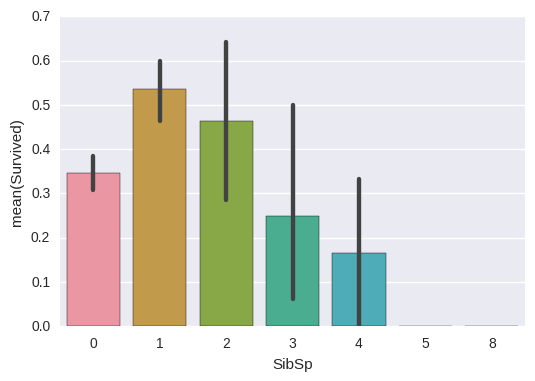

In [15]:
sns.barplot('SibSp','Survived',data= titanic_df)
def spouse_death(SibSp):
    if(SibSp == 1 or SibSp == 2):
        return 1
    else: 
        return 0
    
titanic_df['SibSp'] = titanic_df['SibSp'].apply(spouse_death)
test_df['SibSp'] = test_df['SibSp'].apply(spouse_death)


titanic_df.head()


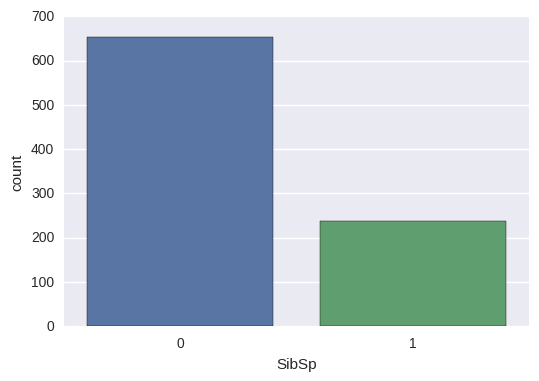

In [16]:
sns.countplot('SibSp',data=titanic_df)

In [17]:
#Fare
titanic_df['Fare'] = titanic_df['Fare'].astype(np.int64)
test_df['Fare'].fillna(test_df['Fare'].median(),inplace = True)
test_df['Fare'] = test_df['Fare'].astype(np.int64)


In [18]:
X_train= titanic_df.iloc[:,1:].values 
y_train= titanic_df.iloc[:,0:1].values

from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(128, input_dim=8),
    Activation('relu'),
    Dense(16),
    Activation('sigmoid'),
    Dense(4),
    Activation('sigmoid'),
    Dense(1),
    Activation('sigmoid'),
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,nb_epoch=750, batch_size=32)
values = model.predict(test_df.iloc[:,1:9].values).astype(np.int64)

In [19]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)

random_forest.fit(X_train, y_train)

Y_pred = random_forest.predict(test_df.iloc[:,1:].values)

random_forest.score(X_train, y_train.ravel())

/usr/local/lib/python3.5/dist-packages/ipykernel/__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.96184062850729513

from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

Y_pred = clf.predict(test_df.iloc[:,1:].values)
clf.score(X_train,y_train)

In [20]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic2.csv', index=False)